In [85]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
++import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(filename='gensim.log', format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)
import logging
logging.basicConfig(filename='gensim.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [166]:
import pickle

with open('data_lemmatized_2.pkl', 'rb') as f:
    data_lemmatized = pickle.load(f)

In [167]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [168]:
print(id2word)

Dictionary(28923 unique tokens: ['bathroom', 'comfortable', 'describe', 'exactly', 'firstly']...)


In [150]:
#id2word.filter_extremes(no_below=20, no_above=0.5)

In [169]:
print(id2word)

Dictionary(28923 unique tokens: ['bathroom', 'comfortable', 'describe', 'exactly', 'firstly']...)


In [114]:
with open('id2word.pkl', 'wb') as f:
    pickle.dump(id2word, f)

In [170]:
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]]


In [171]:
print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 28923
Number of documents: 509208


In [181]:
num_topics = 10
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics, 
                                                random_state=100,
                                                chunksize=2000,
                                                passes=20, 
                                                #alpha='symmetric',
                                                eta=[1]*len(id2word.keys()),
                                                workers=7,
                                                iterations=400,
                                                alpha='asymmetric',
                                                #eta='symmetric',
                                                per_word_topics=True,
                                                #eval_every=1
                                                   )

In [96]:
import pickle
with open('lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)

In [182]:
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

[(0,
  '0.112*"apartment" + 0.081*"clean" + 0.052*"comfortable" + 0.048*"room" + '
  '0.041*"need" + 0.033*"nice" + 0.024*"space" + 0.020*"bed" + '
  '0.019*"spacious" + 0.017*"small"'),
 (1,
  '0.156*"stay" + 0.154*"place" + 0.056*"good" + 0.038*"recommend" + '
  '0.032*"home" + 0.030*"perfect" + 0.020*"family" + 0.019*"experience" + '
  '0.017*"love" + 0.016*"overall"'),
 (2,
  '0.055*"close" + 0.041*"restaurant" + 0.040*"location" + 0.030*"area" + '
  '0.029*"convenient" + 0.023*"walk" + 0.022*"neighborhood" + 0.021*"place" + '
  '0.018*"station" + 0.017*"good"'),
 (3,
  '0.082*"easy" + 0.081*"check" + 0.044*"nice" + 0.037*"communication" + '
  '0.026*"find" + 0.022*"host" + 0.021*"arrive" + 0.017*"time" + 0.015*"meet" '
  '+ 0.014*"know"'),
 (4,
  '0.101*"stay" + 0.069*"time" + 0.067*"thank" + 0.039*"day" + 0.036*"enjoy" + '
  '0.035*"definitely" + 0.030*"trip" + 0.026*"book" + 0.026*"would_definitely" '
  '+ 0.024*"recommend"'),
 (5,
  '0.076*"amazing" + 0.062*"beautiful" + 0.046*

In [183]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.124928  0.262973       1        1  16.919217
1      0.284765  0.039162       2        1  14.471636
2      0.071102  0.180111       3        1  15.652691
3     -0.148268 -0.167608       4        1   7.770514
4      0.184355 -0.113361       5        1   7.083602
5     -0.039988  0.083984       6        1   6.516659
6     -0.142615  0.051531       7        1  10.208251
7     -0.097452 -0.035028       8        1   6.192901
8      0.156396 -0.103505       9        1   6.920218
9     -0.143367 -0.198260      10        1   8.264310, topic_info=          Term          Freq         Total Category  logprob  loglift
38       great  59507.000000  59507.000000  Default  30.0000  30.0000
49        stay  69247.000000  69247.000000  Default  29.0000  29.0000
25       place  68354.000000  68354.000000  Default  28.0000  28.0000
117   location  41778.000000  41778.000000  Default  27.0000  27.0000
36   apartment  48380.000000  48380.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
104      super   2776.975820  10081.350146  Topic10  -4.2385   1.2039
97        need   3549.403707  19560.499829  Topic10  -3.9931   0.7865
100     person   1268.896388   3079.852458  Topic10  -5.0217   1.6065
724       warm   1097.643438   2437.404024  Topic10  -5.1667   1.6955
225        lot   1171.154362  10055.585426  Topic10  -5.1019   0.3431

[514 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
259       1  0.000326   able
259       2  0.000326   able
259       3  0.000978   able
259       4  0.303162   able
259       5  0.105944   able
...     ...       ...    ...
1314      6  0.002755  young
1314      7  0.005510  young
1314      8  0.005510  young
1314      9  0.002755  young
1314     10  0.002755  young

[4270 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [184]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.81878621998545

Coherence Score:  0.5028968724061568


In [105]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=2000,
                                           passes=20,
                                           workers=7,
                                           iterations=400,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [106]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 5
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics)
# Alpha parameter
alpha = [0.001, 0.01, 0.05, 0.1, 1]
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = [0.001, 0.01, 0.05, 0.1, 1]
beta.append('symmetric')
beta.append('auto')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [#gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               #gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=350)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            print(k)
            # iterate through alpha values
            for a in alpha:
                print(a)
                # iterare through beta values
                for b in beta:
                    print(b)
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

  0%|          | 0/100 [00:00<?, ?it/s]

5
0.001
0.001


  1%|          | 1/100 [05:19<8:47:46, 319.86s/it]

0.01


  2%|▏         | 2/100 [10:39<8:42:26, 319.86s/it]

0.05


  3%|▎         | 3/100 [15:58<8:36:28, 319.47s/it]

0.1


  4%|▍         | 4/100 [21:17<8:31:10, 319.49s/it]

1


  5%|▌         | 5/100 [26:50<8:32:09, 323.46s/it]

symmetric


  6%|▌         | 6/100 [32:13<8:26:39, 323.40s/it]

auto


  7%|▋         | 7/100 [37:35<8:20:41, 323.02s/it]

0.01
0.001


  8%|▊         | 8/100 [43:15<8:22:55, 327.99s/it]

0.01


  9%|▉         | 9/100 [48:55<8:23:00, 331.65s/it]

0.05


 10%|█         | 10/100 [54:35<8:20:56, 333.96s/it]

0.1


 11%|█         | 11/100 [1:00:14<8:17:58, 335.71s/it]

1


 12%|█▏        | 12/100 [1:06:10<8:20:56, 341.56s/it]

symmetric


 13%|█▎        | 13/100 [1:11:53<8:16:14, 342.23s/it]

auto


 14%|█▍        | 14/100 [1:17:38<8:11:36, 342.98s/it]

0.05
0.001


 15%|█▌        | 15/100 [1:23:02<7:57:35, 337.13s/it]

0.01


 16%|█▌        | 16/100 [1:28:25<7:46:03, 332.90s/it]

0.05


 17%|█▋        | 17/100 [1:33:47<7:36:03, 329.68s/it]

0.1


 18%|█▊        | 18/100 [1:39:10<7:28:03, 327.85s/it]

1


 19%|█▉        | 19/100 [1:44:48<7:26:22, 330.65s/it]

symmetric


 20%|██        | 20/100 [1:50:13<7:18:53, 329.17s/it]

auto


 21%|██        | 21/100 [1:55:39<7:12:11, 328.24s/it]

0.1
0.001


 22%|██▏       | 22/100 [2:01:09<7:07:04, 328.52s/it]

0.01


 23%|██▎       | 23/100 [2:06:39<7:02:14, 329.02s/it]

0.05


 24%|██▍       | 24/100 [2:12:08<6:56:41, 328.96s/it]

0.1


 25%|██▌       | 25/100 [2:17:36<6:51:05, 328.88s/it]

1


 26%|██▌       | 26/100 [2:23:21<6:51:22, 333.55s/it]

symmetric


 27%|██▋       | 27/100 [2:28:54<6:45:34, 333.35s/it]

auto


 28%|██▊       | 28/100 [2:34:27<6:39:55, 333.26s/it]

1
0.001


 29%|██▉       | 29/100 [2:38:36<6:04:43, 308.21s/it]

0.01


 30%|███       | 30/100 [2:42:46<5:39:02, 290.60s/it]

0.05


 31%|███       | 31/100 [2:46:54<5:19:26, 277.78s/it]

0.1


 32%|███▏      | 32/100 [2:51:04<5:05:26, 269.51s/it]

1


 33%|███▎      | 33/100 [2:55:27<4:58:46, 267.57s/it]

symmetric


 34%|███▍      | 34/100 [2:59:41<4:49:56, 263.59s/it]

auto


 35%|███▌      | 35/100 [3:03:54<4:42:05, 260.39s/it]

symmetric
0.001


 36%|███▌      | 36/100 [3:09:37<5:04:10, 285.16s/it]

0.01


 37%|███▋      | 37/100 [3:15:22<5:18:10, 303.03s/it]

0.05


 38%|███▊      | 38/100 [3:21:06<5:25:45, 315.24s/it]

0.1


 39%|███▉      | 39/100 [3:26:51<5:29:39, 324.26s/it]

1


 40%|████      | 40/100 [3:32:52<5:35:19, 335.32s/it]

symmetric


 41%|████      | 41/100 [3:38:38<5:32:56, 338.59s/it]

auto


 42%|████▏     | 42/100 [3:44:28<5:30:26, 341.84s/it]

asymmetric
0.001


 43%|████▎     | 43/100 [3:50:03<5:22:54, 339.91s/it]

0.01


 44%|████▍     | 44/100 [3:55:39<5:16:15, 338.85s/it]

0.05


 45%|████▌     | 45/100 [4:01:15<5:09:36, 337.76s/it]

0.1


 46%|████▌     | 46/100 [4:06:52<5:03:54, 337.67s/it]

1


 47%|████▋     | 47/100 [4:12:50<5:03:41, 343.79s/it]

symmetric


 48%|████▊     | 48/100 [4:18:30<4:56:48, 342.47s/it]

auto


 49%|████▉     | 49/100 [4:24:10<4:50:29, 341.75s/it]

6
0.001
0.001


 50%|█████     | 50/100 [4:29:30<4:39:29, 335.39s/it]

0.01


 51%|█████     | 51/100 [4:34:51<4:30:17, 330.96s/it]

0.05


 52%|█████▏    | 52/100 [4:40:11<4:22:04, 327.60s/it]

0.1


 53%|█████▎    | 53/100 [4:45:31<4:14:58, 325.50s/it]

1


 54%|█████▍    | 54/100 [4:51:02<4:10:47, 327.12s/it]

symmetric


 55%|█████▌    | 55/100 [4:56:24<4:04:12, 325.61s/it]

auto


 56%|█████▌    | 56/100 [5:01:47<3:58:10, 324.79s/it]

0.01
0.001


 57%|█████▋    | 57/100 [5:07:28<3:56:13, 329.63s/it]

0.01


 58%|█████▊    | 58/100 [5:13:09<3:53:10, 333.10s/it]

0.05


 59%|█████▉    | 59/100 [5:18:51<3:49:22, 335.66s/it]

0.1


 60%|██████    | 60/100 [5:24:33<3:45:09, 337.73s/it]

1


 61%|██████    | 61/100 [5:30:29<3:43:02, 343.14s/it]

symmetric


 62%|██████▏   | 62/100 [5:36:15<3:37:48, 343.90s/it]

auto


 63%|██████▎   | 63/100 [5:42:01<3:32:28, 344.56s/it]

0.05
0.001


 64%|██████▍   | 64/100 [5:47:23<3:22:43, 337.88s/it]

0.01


 65%|██████▌   | 65/100 [5:52:47<3:14:40, 333.72s/it]

0.05


 66%|██████▌   | 66/100 [5:58:09<3:07:04, 330.13s/it]

0.1


 67%|██████▋   | 67/100 [6:03:31<3:00:16, 327.78s/it]

1


 68%|██████▊   | 68/100 [6:09:06<2:55:55, 329.87s/it]

symmetric


 69%|██████▉   | 69/100 [6:14:30<2:49:30, 328.09s/it]

auto


 70%|███████   | 70/100 [6:19:55<2:43:33, 327.10s/it]

0.1
0.001


 71%|███████   | 71/100 [6:25:22<2:38:04, 327.06s/it]

0.01


 72%|███████▏  | 72/100 [6:30:50<2:32:46, 327.37s/it]

0.05


 73%|███████▎  | 73/100 [6:36:16<2:27:12, 327.13s/it]

0.1


 74%|███████▍  | 74/100 [6:41:44<2:21:52, 327.42s/it]

1


 75%|███████▌  | 75/100 [6:47:25<2:18:02, 331.29s/it]

symmetric


 76%|███████▌  | 76/100 [6:52:55<2:12:19, 330.83s/it]

auto


 77%|███████▋  | 77/100 [6:58:25<2:06:49, 330.85s/it]

1
0.001


 78%|███████▊  | 78/100 [7:02:31<1:51:58, 305.40s/it]

0.01


 79%|███████▉  | 79/100 [7:06:39<1:40:46, 287.93s/it]

0.05


 80%|████████  | 80/100 [7:10:44<1:31:42, 275.12s/it]

0.1


 81%|████████  | 81/100 [7:14:51<1:24:29, 266.83s/it]

1


 82%|████████▏ | 82/100 [7:19:11<1:19:24, 264.71s/it]

symmetric


 83%|████████▎ | 83/100 [7:23:21<1:13:44, 260.26s/it]

auto


 84%|████████▍ | 84/100 [7:27:31<1:08:35, 257.19s/it]

symmetric
0.001


 85%|████████▌ | 85/100 [7:33:07<1:10:12, 280.86s/it]

0.01


 86%|████████▌ | 86/100 [7:38:45<1:09:32, 298.02s/it]

0.05


 87%|████████▋ | 87/100 [7:44:22<1:07:05, 309.67s/it]

0.1


 88%|████████▊ | 88/100 [7:50:00<1:03:36, 318.04s/it]

1


 89%|████████▉ | 89/100 [7:55:50<1:00:05, 327.81s/it]

symmetric


 90%|█████████ | 90/100 [8:01:29<55:09, 330.99s/it]  

auto


 91%|█████████ | 91/100 [8:07:07<49:59, 333.30s/it]

asymmetric
0.001


 92%|█████████▏| 92/100 [8:12:49<44:46, 335.78s/it]

0.01


 93%|█████████▎| 93/100 [8:18:31<39:23, 337.68s/it]

0.05


 94%|█████████▍| 94/100 [8:24:10<33:48, 338.15s/it]

0.1


 95%|█████████▌| 95/100 [8:29:52<28:15, 339.18s/it]

1


 96%|█████████▌| 96/100 [8:35:44<22:52, 343.21s/it]

symmetric


 97%|█████████▋| 97/100 [8:41:23<17:05, 341.95s/it]

auto


 98%|█████████▊| 98/100 [8:47:03<11:22, 341.30s/it]

7
0.001
0.001


 99%|█████████▉| 99/100 [8:52:23<05:34, 334.91s/it]

0.01


100%|██████████| 100/100 [8:57:44<00:00, 330.61s/it]

0.05


101it [9:03:03, 327.33s/it]                         

0.1


102it [9:08:24, 325.17s/it]

1


103it [9:13:53, 326.57s/it]

symmetric


104it [9:19:27, 328.72s/it]

auto


105it [9:25:25, 337.52s/it]

0.01
0.001


106it [9:31:25, 344.26s/it]

0.01


107it [9:37:12, 345.06s/it]

0.05


108it [9:42:57, 345.08s/it]

0.1


109it [9:48:42, 344.93s/it]

1


110it [9:54:41, 349.19s/it]

symmetric


111it [10:00:27, 348.34s/it]

auto


112it [10:06:15, 348.22s/it]

0.05
0.001


113it [10:11:41, 341.39s/it]

0.01


114it [10:17:06, 336.46s/it]

0.05


115it [10:22:28, 332.08s/it]

0.1


116it [10:27:50, 329.04s/it]

1


117it [10:33:48, 337.89s/it]

symmetric


118it [10:39:13, 333.97s/it]

auto


119it [10:44:37, 331.03s/it]

0.1
0.001


120it [10:50:25, 336.22s/it]

0.01


121it [10:56:32, 345.41s/it]

0.05


122it [11:02:10, 343.22s/it]

0.1


123it [11:07:38, 338.50s/it]

1


124it [11:13:19, 339.43s/it]

symmetric


125it [11:19:00, 339.72s/it]

auto


126it [11:24:51, 343.06s/it]

1
0.001


127it [11:29:32, 324.48s/it]

0.01


128it [11:33:52, 305.15s/it]

0.05


129it [11:38:10, 290.92s/it]

0.1


130it [11:43:36, 301.67s/it]

1


131it [11:52:08, 364.72s/it]

symmetric


132it [11:59:50, 393.76s/it]

auto


133it [12:07:03, 405.63s/it]

symmetric
0.001


134it [12:15:32, 436.76s/it]

0.01


135it [12:21:44, 417.21s/it]

0.05


136it [12:32:24, 484.06s/it]

0.1


137it [12:43:06, 531.54s/it]

1


138it [12:54:30, 577.07s/it]

symmetric


139it [13:05:37, 604.22s/it]

auto


140it [13:16:31, 619.23s/it]

asymmetric
0.001


141it [13:27:32, 631.70s/it]

0.01


142it [13:38:42, 643.12s/it]

0.05


143it [13:48:44, 630.69s/it]

0.1


144it [13:55:06, 556.15s/it]

1


145it [14:01:10, 498.47s/it]

symmetric


146it [14:07:37, 465.09s/it]

auto


147it [14:14:02, 441.17s/it]

8
0.001
0.001


148it [14:20:02, 416.84s/it]

0.01


149it [14:26:03, 399.96s/it]

0.05


150it [14:32:02, 387.75s/it]

0.1


151it [14:37:38, 372.05s/it]

1


152it [14:43:17, 362.09s/it]

symmetric


153it [14:48:43, 351.45s/it]

auto


154it [14:54:10, 344.19s/it]

0.01
0.001


155it [14:59:57, 344.80s/it]

0.01


156it [15:05:41, 344.66s/it]

0.05


157it [15:11:25, 344.32s/it]

0.1


158it [15:17:12, 345.28s/it]

1


159it [15:23:25, 353.71s/it]

symmetric


160it [15:29:16, 352.69s/it]

auto


161it [15:35:05, 351.69s/it]

0.05
0.001


162it [15:41:02, 353.32s/it]

0.01


163it [15:47:06, 356.37s/it]

0.05


164it [15:52:56, 354.51s/it]

0.1


165it [15:58:26, 347.24s/it]

1


166it [16:04:05, 344.67s/it]

symmetric


167it [16:09:55, 346.26s/it]

auto


168it [16:16:00, 352.07s/it]

0.1
0.001


169it [16:22:06, 356.22s/it]

0.01


170it [16:28:17, 360.61s/it]

0.05


171it [16:34:24, 362.38s/it]

0.1


172it [16:40:37, 365.68s/it]

1


173it [16:47:01, 371.06s/it]

symmetric


174it [16:53:15, 372.00s/it]

auto


175it [16:59:29, 372.65s/it]

1
0.001


176it [17:04:07, 344.24s/it]

0.01


177it [17:08:47, 324.99s/it]

0.05


178it [17:13:26, 311.05s/it]

0.1


179it [17:17:48, 296.53s/it]

1


180it [17:22:06, 284.90s/it]

symmetric


181it [17:26:13, 273.40s/it]

auto


182it [17:30:19, 265.46s/it]

symmetric
0.001


183it [17:35:48, 284.51s/it]

0.01


184it [17:41:21, 298.95s/it]

0.05


185it [17:46:53, 308.69s/it]

0.1


186it [17:52:27, 316.32s/it]

1


187it [17:58:14, 325.66s/it]

symmetric


188it [18:03:49, 328.41s/it]

auto


189it [18:09:35, 333.84s/it]

asymmetric
0.001


190it [18:19:36, 413.92s/it]

0.01


191it [18:28:05, 442.30s/it]

0.05


192it [18:38:25, 495.57s/it]

0.1


193it [18:49:43, 550.35s/it]

1


194it [19:01:22, 595.02s/it]

symmetric


195it [19:12:44, 621.20s/it]

auto


196it [19:24:04, 638.84s/it]

9
0.001
0.001


197it [19:35:08, 646.45s/it]

0.01


198it [19:46:14, 652.26s/it]

0.05


199it [19:55:51, 629.46s/it]

0.1


200it [20:01:21, 539.85s/it]

1


201it [20:07:05, 480.89s/it]

symmetric


202it [20:12:35, 435.65s/it]

auto


203it [20:18:07, 404.49s/it]

0.01
0.001


204it [20:24:00, 389.13s/it]

0.01


205it [20:29:54, 378.59s/it]

0.05


206it [20:35:47, 370.91s/it]

0.1


207it [20:41:43, 366.56s/it]

1


208it [20:47:54, 367.83s/it]

symmetric


209it [20:53:50, 364.13s/it]

auto


210it [20:59:46, 361.73s/it]

0.05
0.001


211it [21:05:19, 353.19s/it]

0.01


212it [21:11:03, 350.40s/it]

0.05


213it [21:16:34, 344.63s/it]

0.1


214it [21:22:07, 341.03s/it]

1


215it [21:27:54, 342.98s/it]

symmetric


216it [21:33:26, 339.78s/it]

auto


217it [21:39:01, 338.13s/it]

0.1
0.001


218it [21:44:33, 336.36s/it]

0.01


219it [21:50:04, 334.80s/it]

0.05


220it [21:55:34, 333.45s/it]

0.1


221it [22:01:07, 333.21s/it]

1


222it [22:07:00, 339.19s/it]

symmetric


223it [22:12:33, 337.15s/it]

auto


224it [22:18:04, 335.29s/it]

1
0.001


225it [22:22:07, 307.87s/it]

0.01


226it [22:26:11, 288.69s/it]

0.05


227it [22:30:16, 275.54s/it]

0.1


228it [22:34:22, 266.56s/it]

1


229it [22:38:40, 263.96s/it]

symmetric


230it [22:42:46, 258.64s/it]

auto


231it [22:47:04, 258.61s/it]

symmetric
0.001


232it [22:52:35, 280.13s/it]

0.01


233it [22:58:09, 296.40s/it]

0.05


234it [23:03:43, 307.56s/it]

0.1


235it [23:09:16, 315.14s/it]

1


236it [23:15:18, 329.37s/it]

symmetric


237it [23:20:49, 329.85s/it]

auto


238it [23:26:23, 331.16s/it]

asymmetric
0.001


239it [23:31:55, 331.16s/it]

0.01


240it [23:37:28, 331.82s/it]

0.05


241it [23:43:01, 332.16s/it]

0.1


242it [23:48:36, 333.18s/it]

1


243it [23:54:23, 337.10s/it]

symmetric


244it [23:59:59, 336.87s/it]

auto


245it [24:05:40, 338.10s/it]

10
0.001
0.001


246it [24:11:05, 334.16s/it]

0.01


247it [24:16:28, 330.93s/it]

0.05


248it [24:21:50, 328.26s/it]

0.1


249it [24:27:16, 327.48s/it]

1


250it [24:32:56, 331.15s/it]

symmetric


251it [24:38:24, 330.23s/it]

auto


252it [24:43:48, 328.50s/it]

0.01
0.001


253it [24:49:37, 334.62s/it]

0.01


254it [24:55:29, 339.79s/it]

0.05


255it [25:01:19, 342.90s/it]

0.1


256it [25:07:14, 346.61s/it]

1


257it [25:13:24, 353.47s/it]

symmetric


258it [25:19:17, 353.47s/it]

auto


259it [25:25:11, 353.53s/it]

0.05
0.001


260it [25:30:39, 345.96s/it]

0.01


261it [25:36:10, 341.25s/it]

0.05


262it [25:41:36, 336.76s/it]

0.1


263it [25:47:05, 334.48s/it]

1


264it [25:52:50, 337.54s/it]

symmetric


265it [25:58:20, 335.46s/it]

auto


266it [26:03:50, 333.81s/it]

0.1
0.001


267it [26:09:21, 332.89s/it]

0.01


268it [26:14:56, 333.46s/it]

0.05


269it [26:20:27, 332.87s/it]

0.1


270it [26:25:57, 331.75s/it]

1


271it [26:31:37, 334.48s/it]

symmetric


272it [26:37:06, 332.77s/it]

auto


273it [26:42:37, 332.07s/it]

1
0.001


274it [26:46:39, 305.22s/it]

0.01


275it [26:50:44, 286.98s/it]

0.05


276it [26:54:46, 273.57s/it]

0.1


277it [26:58:49, 264.51s/it]

1


278it [27:03:05, 261.88s/it]

symmetric


279it [27:07:10, 256.87s/it]

auto


280it [27:11:15, 253.29s/it]

symmetric
0.001


281it [27:16:46, 276.57s/it]

0.01


282it [27:22:20, 293.84s/it]

0.05


283it [27:27:51, 304.93s/it]

0.1


284it [27:33:21, 312.37s/it]

1


285it [27:39:03, 321.38s/it]

symmetric


286it [27:44:34, 324.28s/it]

auto


287it [27:50:05, 326.34s/it]

asymmetric
0.001


288it [27:55:31, 326.10s/it]

0.01


289it [28:00:59, 326.68s/it]

0.05


290it [28:06:22, 325.73s/it]

0.1


291it [28:11:48, 325.70s/it]

1


292it [28:17:33, 331.52s/it]

symmetric


293it [28:23:01, 330.57s/it]

auto


294it [28:28:26, 328.77s/it]

5
0.001
0.001


295it [28:35:12, 351.96s/it]

0.01


296it [28:41:59, 368.33s/it]

0.05


297it [28:48:44, 379.61s/it]

0.1


298it [28:55:32, 387.84s/it]

1


299it [29:02:32, 397.70s/it]

symmetric


300it [29:09:23, 401.56s/it]

auto


301it [29:16:13, 404.22s/it]

0.01
0.001


302it [29:23:26, 412.89s/it]

0.01


303it [29:30:40, 419.20s/it]

0.05


304it [29:37:53, 423.32s/it]

0.1


305it [29:45:07, 426.40s/it]

1


306it [29:52:38, 433.96s/it]

symmetric


307it [29:59:57, 435.22s/it]

auto


308it [30:07:17, 436.69s/it]

0.05
0.001


309it [30:14:09, 429.36s/it]

0.01


310it [30:21:02, 424.55s/it]

0.05


311it [30:27:55, 420.95s/it]

0.1


312it [30:34:48, 418.66s/it]

1


313it [30:41:58, 422.07s/it]

symmetric


314it [30:48:55, 420.42s/it]

auto


315it [30:55:54, 419.94s/it]

0.1
0.001


316it [31:02:51, 419.11s/it]

0.01


317it [31:09:49, 418.94s/it]

0.05


318it [31:16:46, 418.40s/it]

0.1


319it [31:23:44, 418.21s/it]

1


320it [31:31:02, 424.05s/it]

symmetric


321it [31:38:02, 422.99s/it]

auto


322it [31:45:02, 422.06s/it]

1
0.001


323it [31:50:07, 386.89s/it]

0.01


324it [31:55:14, 362.85s/it]

0.05


325it [32:00:20, 345.73s/it]

0.1


326it [32:05:27, 334.11s/it]

1


327it [32:10:50, 330.89s/it]

symmetric


328it [32:16:10, 327.55s/it]

auto


329it [32:21:22, 322.96s/it]

symmetric
0.001


330it [32:28:35, 355.89s/it]

0.01


331it [32:35:49, 379.31s/it]

0.05


332it [32:43:01, 395.31s/it]

0.1


333it [32:50:16, 407.18s/it]

1


334it [32:57:51, 421.51s/it]

symmetric


335it [33:05:10, 426.64s/it]

auto


336it [33:12:26, 429.67s/it]

asymmetric
0.001


337it [33:19:28, 427.19s/it]

0.01


338it [33:26:30, 425.59s/it]

0.05


339it [33:33:31, 424.27s/it]

0.1


340it [33:40:32, 423.43s/it]

1


341it [33:47:57, 429.71s/it]

symmetric


342it [33:55:01, 428.15s/it]

auto


343it [34:02:25, 432.82s/it]

6
0.001
0.001


344it [34:09:43, 434.32s/it]

0.01


345it [34:17:09, 437.78s/it]

0.05


346it [34:24:32, 439.33s/it]

0.1


347it [34:31:31, 433.21s/it]

1


348it [34:39:12, 441.59s/it]

symmetric


349it [34:46:39, 443.38s/it]

auto


350it [34:53:59, 442.26s/it]

0.01
0.001


351it [35:01:09, 438.55s/it]

0.01


352it [35:08:24, 437.55s/it]

0.05


353it [35:15:41, 437.50s/it]

0.1


354it [35:22:56, 436.51s/it]

1


355it [35:30:29, 441.52s/it]

symmetric


356it [35:38:28, 452.81s/it]

auto


357it [35:46:26, 460.41s/it]

0.05
0.001


358it [35:53:53, 456.24s/it]

0.01


359it [36:01:21, 453.85s/it]

0.05


360it [36:08:49, 452.14s/it]

0.1


361it [36:16:20, 451.79s/it]

1


362it [36:23:22, 442.85s/it]

symmetric


363it [36:30:12, 433.15s/it]

auto


364it [36:37:00, 425.32s/it]

0.1
0.001


365it [36:43:51, 421.15s/it]

0.01


366it [36:50:45, 419.00s/it]

0.05


367it [36:57:35, 416.46s/it]

0.1


368it [37:04:27, 415.03s/it]

1


369it [37:11:35, 418.84s/it]

symmetric


370it [37:18:28, 417.21s/it]

auto


371it [37:25:23, 416.43s/it]

1
0.001


372it [37:30:24, 381.93s/it]

0.01


373it [37:35:29, 358.61s/it]

0.05


374it [37:40:32, 341.96s/it]

0.1


375it [37:45:36, 330.74s/it]

1


376it [37:50:57, 327.75s/it]

symmetric


377it [37:56:06, 322.14s/it]

auto


378it [38:01:14, 317.99s/it]

symmetric
0.001


379it [38:08:18, 349.62s/it]

0.01


380it [38:15:22, 371.93s/it]

0.05


381it [38:22:23, 386.83s/it]

0.1


382it [38:29:25, 397.42s/it]

1


383it [38:36:48, 411.04s/it]

symmetric


384it [38:43:53, 415.04s/it]

auto


385it [38:50:57, 417.93s/it]

asymmetric
0.001


386it [38:58:07, 421.43s/it]

0.01


387it [39:05:20, 424.87s/it]

0.05


388it [39:12:29, 426.03s/it]

0.1


389it [39:19:36, 426.31s/it]

1


390it [39:26:59, 431.60s/it]

symmetric


391it [39:34:03, 429.03s/it]

auto


392it [39:41:12, 429.05s/it]

7
0.001
0.001


393it [39:47:56, 421.52s/it]

0.01


394it [39:54:41, 416.76s/it]

0.05


395it [40:01:26, 413.27s/it]

0.1


396it [40:08:12, 410.98s/it]

1


397it [40:15:09, 412.81s/it]

symmetric


398it [40:21:54, 410.50s/it]

auto


399it [40:28:40, 409.02s/it]

0.01
0.001


400it [40:35:54, 416.48s/it]

0.01


401it [40:43:07, 421.64s/it]

0.05


402it [40:50:20, 424.98s/it]

0.1


403it [40:57:33, 427.44s/it]

1


404it [41:05:04, 434.45s/it]

symmetric


405it [41:12:26, 436.76s/it]

auto


406it [41:19:44, 437.09s/it]

0.05
0.001


407it [41:26:32, 428.46s/it]

0.01


408it [41:33:22, 422.79s/it]

0.05


409it [41:40:08, 417.67s/it]

0.1


410it [41:46:55, 414.44s/it]

1


411it [41:53:57, 416.72s/it]

symmetric


412it [42:00:46, 414.66s/it]

auto


413it [42:07:37, 413.31s/it]

0.1
0.001


414it [42:14:31, 413.71s/it]

0.01


415it [42:21:27, 414.33s/it]

0.05


416it [42:28:22, 414.54s/it]

0.1


417it [42:35:17, 414.62s/it]

1


418it [42:42:29, 419.73s/it]

symmetric


419it [42:49:26, 419.03s/it]

auto


420it [42:56:22, 418.13s/it]

1
0.001


421it [43:01:30, 385.00s/it]

0.01


422it [43:06:39, 362.20s/it]

0.05


423it [43:11:47, 346.00s/it]

0.1


424it [43:16:57, 335.17s/it]

1


425it [43:22:22, 332.05s/it]

symmetric


426it [43:27:33, 326.01s/it]

auto


428it [43:39:49, 352.46s/it]

0.01


429it [43:46:55, 374.39s/it]

0.05


430it [43:53:57, 388.92s/it]

0.1


431it [44:01:01, 399.36s/it]

1


432it [44:08:24, 412.29s/it]

symmetric


433it [44:15:30, 416.60s/it]

auto


434it [44:22:35, 419.03s/it]

asymmetric
0.001


435it [44:29:57, 426.03s/it]

0.01


436it [44:37:22, 431.48s/it]

0.05


437it [44:44:35, 431.97s/it]

0.1


438it [44:51:56, 434.67s/it]

1


439it [44:59:24, 438.66s/it]

symmetric


440it [45:06:34, 436.08s/it]

auto


441it [45:13:45, 434.71s/it]

8
0.001
0.001


442it [45:20:31, 426.10s/it]

0.01


443it [45:27:17, 420.03s/it]

0.05


444it [45:34:03, 415.79s/it]

0.1


445it [45:40:52, 413.63s/it]

1


446it [45:48:01, 418.24s/it]

symmetric


447it [45:54:49, 415.33s/it]

auto


448it [46:01:38, 413.39s/it]

0.01
0.001


449it [46:08:54, 420.18s/it]

0.01


450it [46:16:07, 424.14s/it]

0.05


451it [46:23:22, 427.23s/it]

0.1


452it [46:30:38, 429.77s/it]

1


453it [46:38:18, 438.88s/it]

symmetric


454it [46:45:36, 438.74s/it]

auto


455it [46:52:53, 438.14s/it]

0.05
0.001


456it [46:59:39, 428.62s/it]

0.01


457it [47:06:27, 422.42s/it]

0.05


458it [47:13:14, 417.66s/it]

0.1


459it [47:20:01, 414.65s/it]

1


460it [47:27:09, 418.62s/it]

symmetric


461it [47:33:59, 415.99s/it]

auto


462it [47:40:50, 414.52s/it]

0.1
0.001


463it [47:47:41, 413.54s/it]

0.01


464it [47:54:35, 413.63s/it]

0.05


465it [48:01:26, 412.64s/it]

0.1


466it [48:08:21, 413.53s/it]

1


467it [48:15:32, 418.74s/it]

symmetric


468it [48:22:26, 417.38s/it]

auto


469it [48:29:23, 417.25s/it]

1
0.001


470it [48:34:25, 382.48s/it]

0.01


471it [48:39:25, 357.91s/it]

0.05


472it [48:44:26, 340.70s/it]

0.1


473it [48:49:28, 329.29s/it]

1


474it [48:54:45, 325.60s/it]

symmetric


475it [48:59:49, 319.01s/it]

auto


476it [49:04:53, 314.57s/it]

symmetric
0.001


477it [49:11:43, 343.04s/it]

0.01


478it [49:18:35, 363.94s/it]

0.05


479it [49:25:27, 378.33s/it]

0.1


480it [49:32:19, 388.43s/it]

1


481it [49:39:35, 402.63s/it]

symmetric


482it [49:46:28, 405.68s/it]

auto


483it [49:53:22, 408.13s/it]

asymmetric
0.001


484it [50:00:17, 410.29s/it]

0.01


485it [50:07:15, 412.57s/it]

0.05


486it [50:14:11, 413.58s/it]

0.1


487it [50:21:09, 415.07s/it]

1


488it [50:28:29, 422.36s/it]

symmetric


489it [50:35:28, 421.30s/it]

auto


490it [50:42:27, 420.82s/it]

9
0.001
0.001


491it [50:49:21, 418.75s/it]

0.01


492it [50:56:16, 417.64s/it]

0.05


493it [51:03:10, 416.32s/it]

0.1


494it [51:10:06, 416.36s/it]

1


495it [51:17:20, 421.70s/it]

symmetric


496it [51:24:17, 420.17s/it]

auto


497it [51:31:12, 418.75s/it]

0.01
0.001


498it [51:38:36, 426.33s/it]

0.01


499it [51:46:01, 431.84s/it]

0.05


500it [51:53:24, 435.19s/it]

0.1


501it [52:00:49, 438.20s/it]

1


502it [52:08:35, 446.64s/it]

symmetric


503it [52:16:06, 447.84s/it]

auto


504it [52:23:35, 448.19s/it]

0.05
0.001


505it [52:30:35, 439.83s/it]

0.01


506it [52:37:36, 434.18s/it]

0.05


507it [52:44:35, 429.55s/it]

0.1


508it [52:51:35, 426.77s/it]

1


509it [52:58:54, 430.21s/it]

symmetric


510it [53:05:55, 427.52s/it]

auto


511it [53:12:57, 425.85s/it]

0.1
0.001


512it [53:19:54, 423.26s/it]

0.01


513it [53:26:52, 421.79s/it]

0.05


514it [53:33:49, 420.27s/it]

0.1


515it [53:40:48, 419.76s/it]

1


516it [53:48:09, 426.30s/it]

symmetric


517it [53:55:09, 424.22s/it]

auto


518it [54:02:07, 422.55s/it]

1
0.001


519it [54:07:08, 386.06s/it]

0.01


520it [54:12:08, 360.31s/it]

0.05


521it [54:17:08, 342.01s/it]

0.1


522it [54:22:08, 329.58s/it]

1


523it [54:27:27, 326.45s/it]

symmetric


524it [54:32:30, 319.26s/it]

auto


525it [54:37:34, 314.83s/it]

symmetric
0.001


526it [54:44:32, 345.77s/it]

0.01


527it [54:51:34, 368.45s/it]

0.05


528it [54:58:31, 383.12s/it]

0.1


529it [55:05:30, 393.89s/it]

1


530it [55:12:43, 405.58s/it]

symmetric


531it [55:19:41, 409.32s/it]

auto


532it [55:26:41, 412.55s/it]

asymmetric
0.001


533it [55:33:40, 414.45s/it]

0.01


534it [55:40:39, 415.66s/it]

0.05


535it [55:47:36, 416.11s/it]

0.1


536it [55:54:29, 415.29s/it]

1


537it [56:01:48, 422.36s/it]

symmetric


538it [56:08:49, 421.96s/it]

auto


539it [56:15:49, 421.39s/it]

10
0.001
0.001


540it [56:22:35, 416.87s/it]

0.01


541it [56:29:21, 413.55s/it]

0.05


542it [56:36:05, 410.73s/it]

0.1


543it [56:42:56, 410.62s/it]

1


544it [56:50:05, 416.22s/it]

symmetric


545it [56:56:51, 413.14s/it]

auto


546it [57:03:39, 411.54s/it]

0.01
0.001


547it [57:11:00, 420.45s/it]

0.01


548it [57:18:25, 427.85s/it]

0.05


549it [57:25:51, 433.19s/it]

0.1


550it [57:33:16, 436.81s/it]

1


551it [57:41:02, 445.52s/it]

symmetric


552it [57:48:28, 445.82s/it]

auto


553it [57:55:57, 446.56s/it]

0.05
0.001


554it [58:02:50, 436.56s/it]

0.01


555it [58:09:45, 430.00s/it]

0.05


556it [58:16:36, 424.50s/it]

0.1


557it [58:23:33, 422.04s/it]

1


558it [58:30:50, 426.57s/it]

symmetric


559it [58:37:48, 423.95s/it]

auto


560it [58:44:42, 421.20s/it]

0.1
0.001


561it [58:51:36, 419.10s/it]

0.01


562it [58:58:33, 418.39s/it]

0.05


563it [59:05:35, 419.42s/it]

0.1


564it [59:12:30, 418.03s/it]

1


565it [59:19:38, 421.04s/it]

symmetric


566it [59:26:32, 418.99s/it]

auto


567it [59:33:25, 417.13s/it]

1
0.001


568it [59:38:24, 381.86s/it]

0.01


569it [59:43:26, 357.82s/it]

0.05


570it [59:48:25, 340.06s/it]

0.1


571it [59:53:26, 328.50s/it]

1


572it [59:58:44, 325.12s/it]

symmetric


573it [60:03:44, 317.69s/it]

auto


574it [60:08:43, 312.25s/it]

symmetric
0.001


575it [60:15:40, 343.54s/it]

0.01


576it [60:22:37, 365.48s/it]

0.05


577it [60:29:36, 381.62s/it]

0.1


578it [60:36:28, 390.86s/it]

1


579it [60:43:40, 403.14s/it]

symmetric


580it [60:50:38, 407.67s/it]

auto


581it [60:57:35, 410.40s/it]

asymmetric
0.001


582it [61:04:59, 420.29s/it]

0.01


583it [61:12:22, 427.34s/it]

0.05


584it [61:19:11, 421.76s/it]

0.1


585it [61:26:04, 419.00s/it]

1


586it [61:33:23, 424.99s/it]

symmetric


587it [61:40:49, 431.50s/it]

auto


588it [61:48:41, 378.44s/it]


In [107]:
tuning = pd.read_csv('lda_tuning_results.csv')
tuning.max()

Validation_Set    75% Corpus
Topics                    10
Alpha              symmetric
Beta               symmetric
Coherence           0.513025
dtype: object

In [111]:
tuning

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,5,0.001,0.001,0.399085
1,75% Corpus,5,0.001,0.01,0.399085
2,75% Corpus,5,0.001,0.05,0.399085
3,75% Corpus,5,0.001,0.1,0.389139
4,75% Corpus,5,0.001,1,0.388934
...,...,...,...,...,...
583,100% Corpus,10,asymmetric,0.05,0.466343
584,100% Corpus,10,asymmetric,0.1,0.467421
585,100% Corpus,10,asymmetric,1,0.501456
586,100% Corpus,10,asymmetric,symmetric,0.462410


In [185]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, 
                                                        num_topics=num_topics, 
                                                        id2word=id2word, 
                                                        random_state=100,
                                                        chunksize=2000,
                                                        passes=20, 
                                                        #alpha='symmetric',
                                                        eta=[1]*len(id2word.keys()),
                                                        workers=7,
                                                        iterations=400,
                                                        alpha='asymmetric',
                                                        #eta='symmetric',
                                                        per_word_topics=True,
                                                        #eval_every=1
                                                       )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [186]:
%%time
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=5, limit=11, step=1)

CPU times: user 42min 29s, sys: 2min 26s, total: 44min 55s
Wall time: 44min 5s


In [102]:
with open('model_list.pkl', 'wb') as f:
    pickle.dump(model_list, f)

In [103]:
with open('coherence_values.pkl', 'wb') as f:
    pickle.dump(coherence_values, f)

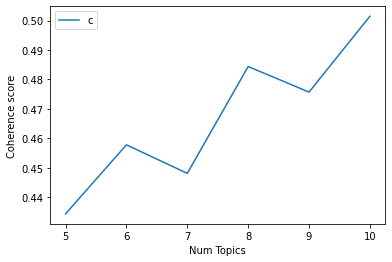

In [187]:
# Show graph
limit=11; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [180]:
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.090*"apartment" + 0.078*"clean" + 0.050*"comfortable" + 0.049*"room" + '
  '0.030*"need" + 0.026*"nice" + 0.020*"bed" + 0.018*"spacious" + '
  '0.016*"small" + 0.014*"good"'),
 (1,
  '0.161*"place" + 0.156*"stay" + 0.046*"good" + 0.030*"home" + '
  '0.019*"perfect" + 0.018*"family" + 0.017*"recommend" + '
  '0.015*"highly_recommend" + 0.015*"love" + 0.013*"overall"'),
 (2,
  '0.056*"location" + 0.052*"close" + 0.039*"restaurant" + 0.027*"convenient" '
  '+ 0.025*"area" + 0.022*"place" + 0.021*"good" + 0.020*"neighborhood" + '
  '0.018*"perfect" + 0.018*"apartment"'),
 (3,
  '0.091*"check" + 0.085*"easy" + 0.060*"nice" + 0.043*"communication" + '
  '0.026*"host" + 0.022*"find" + 0.015*"communicate" + 0.014*"time" + '
  '0.013*"know" + 0.012*"late"'),
 (4,
  '0.104*"stay" + 0.062*"recommend" + 0.061*"thank" + 0.045*"definitely" + '
  '0.044*"time" + 0.034*"enjoy" + 0.027*"day" + 0.023*"would_definitely" + '
  '0.021*"book" + 0.018*"come"'),
 (5,
  '0.065*"beautiful" + 0.046*"am

In [188]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.055438 -0.208498       1        1  17.372314
2      0.193717 -0.144699       2        1  16.191590
1      0.179188  0.131297       3        1  13.908167
6     -0.175504 -0.077717       4        1   9.776118
9     -0.186079  0.132988       5        1   9.534498
4      0.020768  0.226347       6        1   7.581520
8      0.215424  0.066982       7        1   6.974802
3     -0.159451  0.080567       8        1   6.851143
5      0.040341 -0.153173       9        1   6.107894
7     -0.072965 -0.054093      10        1   5.701954, topic_info=         Term          Freq         Total Category  logprob  loglift
38      great  60996.000000  60996.000000  Default  30.0000  30.0000
49       stay  69858.000000  69858.000000  Default  29.0000  29.0000
25      place  69455.000000  69455.000000  Default  28.0000  28.0000
117  location  42228.000000  42228.000000  Default  27.0000  27.0000
77      clean  31592.000000  31592.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
272       use   1101.983917   5914.546940  Topic10  -4.7916   1.1841
187       kid    652.112169   1362.619675  Topic10  -5.3163   2.1274
200    little    900.297099   6489.440715  Topic10  -4.9938   0.8892
33        day    724.727710   8044.329364  Topic10  -5.2107   0.4574
161      love    726.849619   9169.876857  Topic10  -5.2078   0.3294

[583 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
259       1  0.005586  able
259       2  0.047643  able
259       3  0.001314  able
259       4  0.174470  able
259       5  0.183013  able
...     ...       ...   ...
1006      6  0.976162  year
1006      7  0.002204  year
1006      8  0.002204  year
1006      9  0.002204  year
1006     10  0.002204  year

[4800 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 7, 10, 5, 9, 4, 6, 8])